In [3]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import nltk
nltk.download('punkt')
import numpy as np
import random
import string

import bs4 as bs
from bs4 import BeautifulSoup
import urllib.request
import re
import os
import time
import pandas as pd
import matplotlib.pyplot as plt
import csv


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### **رده بندی بیز ساده**

In [0]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB

def NaiveBayes(X_train, y_train, X_test):
  clf = GaussianNB()
  clf.fit(X_train, y_train)

  y_pred = clf.predict(X_test)
  return y_pred

### **رده بند ماشین بردار پشتیبان**

In [0]:
# SVM
from sklearn import svm

def SVM(X_train, y_train, X_test):
  clf = svm.SVC(kernel = 'linear')
  clf.fit(X_train, y_train)

  y_pred = clf.predict(X_test)
  return y_pred


### **رده بند درخت تصمیم گیری**

In [0]:
# Desision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

def DesisionTree(X_train, y_train, X_test):
  clf = DecisionTreeClassifier()
  clf.fit( X_train, y_train)

  y_pred = clf.predict(X_test)
  return y_pred

### **رده بند جنگل‏ های تصمیم تصادفی**

In [0]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier

def RandomForest(X_train, y_train, X_test):
  clf = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)
  clf.fit(X_train, y_train)

  y_pred = clf.predict(X_test)
  return y_pred


### **آزمون های رده بند**

In [0]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix

def confusionMatrix(y_true, y_pred):
  M = confusion_matrix(y_true, y_pred)
  # plot
  plt.matshow(M)
  plt.title('Confusion matrix')
  plt.colorbar()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()
  return M

In [0]:
# ROC

from sklearn import metrics

def roc(y_true, y_pred):
  fpr, tpr, thresholds = metrics.roc_curve(y_true, y_pred)
  return fpr, tpr, thresholds

In [0]:
# AUC

from sklearn import metrics

def auc(y_true, y_pred):
  fpr, tpr, thresholds = metrics.roc_curve(y_true, y_pred)
  A = metrics.auc(fpr, tpr)
  return A

In [0]:
# Precision

from sklearn.metrics import precision_score

def precision(y_true, y_pred):
  P = precision_score(y_true, y_pred, average='macro') 
  return P

In [0]:
# Recall

from sklearn.metrics import recall_score

def recall(y_true, y_pred):
  R = recall_score(y_true, y_pred, average='macro') 
  return R

In [0]:
# f1 score

from sklearn.metrics import f1_score

def f1Score(y_true, y_pred):
  f1 = f1_score(y_true, y_pred, average='macro')  
  return f1

### تمیزکردن دادگان
برای این قسمت ابتدا حروف بزرگ به کوچک تبدیل می شوند و سپس اعداد را می حذفیم و کلمات مخفف دار را درست می کنیم. علائم نگارشی نیز چون به کلمات دیگر ممکن است چسبیده باشند، با فاصله و علامت جایگزین می شوند.و یک سری را هم حذف می کنیم.
بعد از آن تگ ها اچ تی ام ال موجود حذف می شوند

In [0]:
def cleanText(text):
    # to lower case
    text = text.lower()

    text = re.sub(r'\d +', '', text)
    text = re.sub(r'\'m', ' am', text)
    text = re.sub(r'\'d ', ' would', text)
    text = re.sub(r'\'ll ', ' will', text)
    text = re.sub(r'\'t ', ' not', text)
    text = re.sub(r'\'ve ', ' have', text)
    text = re.sub(r'\'re ', ' are', text)
    text = re.sub(r'\'s ', ' is', text)

    text = re.sub(r'\,', ' ', text)
    text = re.sub(r'\!', ' ! ', text)
    text = re.sub(r'\?', ' ? ', text)
    text = re.sub(r'\-', ' ', text)
    text = re.sub(r'\(', ' ', text)
    text = re.sub(r'\(', ' ', text)
    text = re.sub(r'\*', ' ', text)

    text = re.sub('  ', ' ', text)
    text = re.sub('  ', ' ', text)
    text = re.sub('  ', ' ', text)
    text = re.sub('  ', ' ', text)

    text = re.sub(r'\<br /> ', '', text)

    # Remove whitespaces
    text = text.strip()

    return text

در این بخش تمامی دادگان از فایل ها خوانده شده و هر نظر را در یک خانه از یک لیست ذخیره می کنیم.
خانه اول لیست allData دادگان آموزشی می باشند و خانه دوم آن دادگان آزمون.

خروجی این تابع تمامی این دادگان می باشد.

In [0]:
def getAllData():

    fullpathes = ['train/pos/', 'train/neg/', 'test/pos/', 'test/neg/']
    pathes = ['train/train', 'train/train', 'test/test', 'test/test']
    allData = []
    countVocabs = []


    for fullpath, path, i in zip(fullpathes, pathes, range(4)):
        print('i : ', i)
        if i == 0 or i == 2:
            t = int(i/2)
            allData.append([])

        folder = "/content/sample_data/data/aclImdb/"+fullpath

        for file in os.listdir(folder):
            filepath = os.path.join(folder, file)
            f = open(filepath, 'r')
            comment = cleanText(f.read())
            if i < 2:          
                allData[t].append(comment)
            else:
                allData[t].append(comment)
            f.close()
        i += 1

    return allData

### **BOW**

### **شمارش واژگان**
در این قسمت برای داده های تست و آموزشی تعداد تکرار هر کلمه را با کمک تابع CountVectorizer به دست می آوریم.
سپس ماتریسی شامل وکتور تمامی نظرات را به عنوان خروجی می دهیم.همچنین کلماتی را که توسط این تابع ، شمارش می شوند را خروجی می دهیم تا بعدا با ساختن دیکشنری از آن و دادن آن به تابعcountVocab_test ، تعداد تکرار همین کلمات در دادگان آزمون نیز به دست آورده شده و مااتریسی از وکتور های هر نظر را به عنوان خروجی بدهیم.

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
def countVocab_train(text):
    vectorizer = CountVectorizer({'english'},min_df=0.005, max_df=0.995)
    X = vectorizer.fit_transform(text)
    y = vectorizer.get_feature_names()
    return X.toarray(),y

def countVocab_test(text, vocabs):
    vectorizer = CountVectorizer({'english'}, vocabulary=vocabs)
    X = vectorizer.fit_transform(text)
    return X.toarray()

در این قسمت دیکشنری شامل کلمات شمرده شده و مورد استفاده دادگان آموزشی به عنوان خروجی داده می شود.

In [0]:
def makeDictionary(vocab):
    vocabs = {}
    for j, item in zip(range(len(vocab)),vocab):
        vocabs[item] = j
    return vocabs

در این قسمت تابع به دست آوردن BOW را داریم.
در آن ابتدا برای دادگان آموزشی ماتریسی از وکتور نظرات به دست می آوریم و کلماتی که در این ماتریس مورد استفاده قرار گرفتند را برای به دست آوردن ماتریس وکتورهای نظرا آزمون استفاده می کنیم.

آرایه ای از این دو ماتریس به ترتیب ویژگی های کلاس بندی برای دادگان آموزشی و آزمون می باشند.

در آخر نیز آرایه ای از برچسب های صفر و یک را برای داده های آموزشی و آزمون به دست می آوریم.

In [0]:
# BOW data

def BOW(allData):

    cVocab_train, vocab = countVocab_train(allData[0])
    vocabs = makeDictionary(vocab)      
    
    cVocab_test = countVocab_test(allData[1],vocabs)   

    X_train = np.array(cVocab_train.tolist())
    X_test = np.array(cVocab_test.tolist())

    y_train = np.array(np.ones((12500)).tolist()+np.zeros((12480)).tolist())
    y_test = np.array(np.ones((12500)).tolist()+np.zeros((12480)).tolist())

    return X_train, y_train, X_test, y_test

### **tf-idf**

برای این قسمت نیاز است که مثل توابع استفاده شده برای bow، تابع TfidfVectorizer را استفاده می کنیم که تعدد کلمات را می شمرد و برای تمامی نظرات وکتور تعداد آن ها را خروجی می دهد. برای این بخش برای اینکه stop word ها حذف شوند، به عنوان ورودی تابع، {'english'} را می دهیم.

برای داده های آزمایشی هم به همان روش گفته شده در BOW عمل کردیم.

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

def tf_idf_withoutStopWords_train(text):
    vectorizer = TfidfVectorizer({'english'},min_df=0.005, max_df=0.995)
    X = vectorizer.fit_transform(text)
    y = vectorizer.get_feature_names()
    return X.toarray(),y

def tf_idf_withoutStopWords_test(text, vocabs):
    vectorizer = TfidfVectorizer({'english'}, vocabulary=vocabs)
    X = vectorizer.fit_transform(text)

    return X.toarray()

def tf_idf_withStopWords_train(text):
    vectorizer = TfidfVectorizer(min_df=0.005, max_df=0.995)
    X = vectorizer.fit_transform(text)
    y = vectorizer.get_feature_names()
    return X.toarray(),y

def tf_idf_withStopWords_test(text, vocabs):
    vectorizer = TfidfVectorizer(vocabulary=vocabs)
    X = vectorizer.fit_transform(text)

    return X.toarray()

در این قسمت کلیات این بخش پیاده سازی شده و در نهایت ماتریس وکتورهای نظرات را به عنوان ویژگی ها در نظر می گیرد.

In [0]:
# tf-idf data with stop words

def tf_idf_withStopWords(allData):

    cVocab_train, vocab = tf_idf_withStopWords_train(allData[0])
    vocabs = makeDictionary(vocab)      
    
    cVocab_test = tf_idf_withStopWords_test(allData[1],vocabs)   

    X_train = np.array(cVocab_train.tolist())
    X_test = np.array(cVocab_test.tolist())

    y_train = np.array(np.ones((12500)).tolist()+np.zeros((12480)).tolist())
    y_test = np.array(np.ones((12500)).tolist()+np.zeros((12480)).tolist())

    return X_train, y_train, X_test, y_test

In [0]:
# tf-idf data without stop words 

def tf_idf_withoutStopWords(allData):

    cVocab_train, vocab = tf_idf_withoutStopWords_train(allData[0])
    vocabs = makeDictionary(vocab)      
    
    cVocab_test = tf_idf_withoutStopWords_test(allData[1],vocabs)   

    X_train = np.array(cVocab_train.tolist())
    X_test = np.array(cVocab_test.tolist())

    y_train = np.array(np.ones((12500)).tolist()+np.zeros((12480)).tolist())
    y_test = np.array(np.ones((12500)).tolist()+np.zeros((12480)).tolist())

    return X_train, y_train, X_test, y_test

### **BERT Embedding**

In [23]:
allData = getAllData()

i :  0
i :  1
i :  2
i :  3


این تابع قسمت اصلی عملیات BERT پیاده سازی شده است. نظرات چون هر کدام شامل چندین جمله می باشند، به وسیله تابع آماده sent_tokenize جدا جدا می شوند.
برای هر جمله هر نظر وکتور به دست آورده شده و در نهایت میانگین تمامی جملات به عنوان وکتور نهایی هر نظر در نظر گرفته شده و به عنوان خروجی داده می شود.

In [0]:
# BERT Embedding

from sentence_transformers import SentenceTransformer
from nltk.tokenize import sent_tokenize

def BERT(comment, model):
    embeddingVectors = []
    comment = sent_tokenize(comment)
    sentence_embeddings = model.encode(comment)

    endVector = np.average(sentence_embeddings,axis= 0)
    return endVector


در این بخش از تابع SentenceTransformer برای ساخت مدل BERT استفاده می شود. نیز یک بار برای تمامی دادگان آموزشی تابع BERT فراخوانی شده و یک بار برای تمامی دادگان آزمون.

در نهایت خروجی آن، ویژگی های دادگان آموزشی و آزمون است به همراه برچسب این داده ها.

In [0]:
def BERT_Embeding(allData):

    bert_train = []
    bert_test = []

    model = SentenceTransformer('bert-base-nli-mean-tokens')

    i = 0
    for comment in enumerate(allData[0]):
        bert_train.append(BERT(comment[1], model))
        print('train Bert i: ',i)
        i += 1
    i = 0
    print('train_bert ended!')
    for comment in enumerate(allData[1]):
        bert_test.append(BERT(comment[1], model))
        print('test Bert i: ',i)
        i += 1

    X_train = np.array(bert_train)
    X_test = np.array(bert_test)

    y_train = np.array(np.ones((12500)).tolist()+np.zeros((12480)).tolist())
    y_test = np.array(np.ones((12500)).tolist()+np.zeros((12480)).tolist())

    return X_train, y_train, X_test, y_test


In [0]:
# !pip install -U sentence-transformers

### **ارزیابی**

در این قسمت تمامی متدها و کلاس بندی ها و آزمون های رده بند استفاده شده تا نتایج کار را بتوان در خروجی مشاهده کرد.

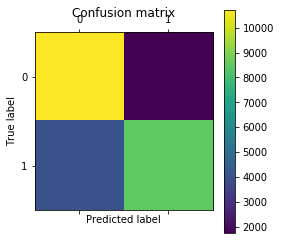

BOW Naive_Bayes Confusion_Matrix [[10728  1752]
 [ 4007  8493]]
BOW Naive_Bayes ROC [0.         0.14038462 1.        ] [0.      0.67944 1.     ] [2. 1. 0.]
BOW Naive_Bayes AUC 0.7695276923076924
BOW Naive_Bayes Precision 0.7785260937370361
BOW Naive_Bayes Recall 0.7695276923076924
BOW Naive_Bayes f1_Score 0.7675951255173271


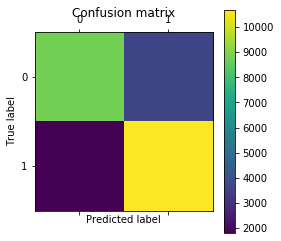

BOW Random_Forest Confusion_Matrix [[ 8829  3651]
 [ 1799 10701]]
BOW Random_Forest ROC [0.         0.29254808 1.        ] [0.      0.85608 1.     ] [2. 1. 0.]
BOW Random_Forest AUC 0.7817659615384616
BOW Random_Forest Precision 0.7881702573375309
BOW Random_Forest Recall 0.7817659615384616
BOW Random_Forest f1_Score 0.7805932729792096


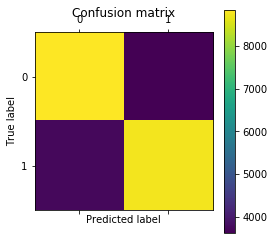

BOW Desision_Tree Confusion_Matrix [[8859 3621]
 [3743 8757]]
BOW Desision_Tree ROC [0.         0.29014423 1.        ] [0.      0.70056 1.     ] [2. 1. 0.]
BOW Desision_Tree AUC 0.7052078846153845
BOW Desision_Tree Precision 0.7052242551963568
BOW Desision_Tree Recall 0.7052078846153846
BOW Desision_Tree f1_Score 0.7051992480982019


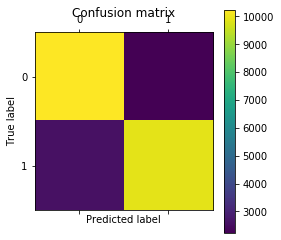

tf_idf_withoutStopWords Naive_Bayes Confusion_Matrix [[10246  2234]
 [ 2581  9919]]
tf_idf_withoutStopWords Naive_Bayes ROC [0.         0.17900641 1.        ] [0.      0.79352 1.     ] [2. 1. 0.]
tf_idf_withoutStopWords Naive_Bayes AUC 0.8072567948717948
tf_idf_withoutStopWords Naive_Bayes Precision 0.8074804455043009
tf_idf_withoutStopWords Naive_Bayes Recall 0.8072567948717948
tf_idf_withoutStopWords Naive_Bayes f1_Score 0.8072127605259072


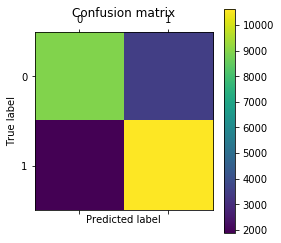

tf_idf_withoutStopWords Random_Forest Confusion_Matrix [[ 8963  3517]
 [ 1891 10609]]
tf_idf_withoutStopWords Random_Forest ROC [0.        0.2818109 1.       ] [0.      0.84872 1.     ] [2. 1. 0.]
tf_idf_withoutStopWords Random_Forest AUC 0.7834545512820513
tf_idf_withoutStopWords Random_Forest Precision 0.7884024954174701
tf_idf_withoutStopWords Random_Forest Recall 0.7834545512820512
tf_idf_withoutStopWords Random_Forest f1_Score 0.7825627254615487


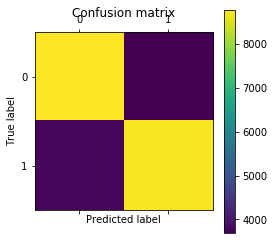

tf_idf_withoutStopWords Desision_Tree Confusion_Matrix [[8788 3692]
 [3756 8744]]
tf_idf_withoutStopWords Desision_Tree ROC [0.         0.29583333 1.        ] [0.      0.69952 1.     ] [2. 1. 0.]
tf_idf_withoutStopWords Desision_Tree AUC 0.7018433333333334
tf_idf_withoutStopWords Desision_Tree Precision 0.701846976930045
tf_idf_withoutStopWords Desision_Tree Recall 0.7018433333333334
tf_idf_withoutStopWords Desision_Tree f1_Score 0.7018405481203236


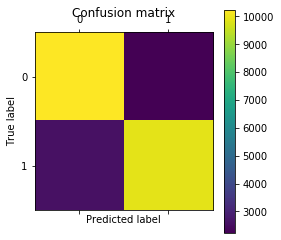

tf_idf_withStopWords Naive_Bayes Confusion_Matrix [[10246  2234]
 [ 2581  9919]]
tf_idf_withStopWords Naive_Bayes ROC [0.         0.17900641 1.        ] [0.      0.79352 1.     ] [2. 1. 0.]
tf_idf_withStopWords Naive_Bayes AUC 0.8072567948717948
tf_idf_withStopWords Naive_Bayes Precision 0.8074804455043009
tf_idf_withStopWords Naive_Bayes Recall 0.8072567948717948
tf_idf_withStopWords Naive_Bayes f1_Score 0.8072127605259072


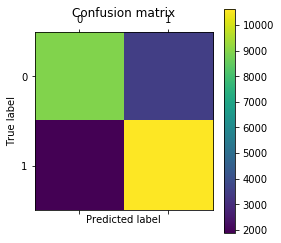

tf_idf_withStopWords Random_Forest Confusion_Matrix [[ 8963  3517]
 [ 1891 10609]]
tf_idf_withStopWords Random_Forest ROC [0.        0.2818109 1.       ] [0.      0.84872 1.     ] [2. 1. 0.]
tf_idf_withStopWords Random_Forest AUC 0.7834545512820513
tf_idf_withStopWords Random_Forest Precision 0.7884024954174701
tf_idf_withStopWords Random_Forest Recall 0.7834545512820512
tf_idf_withStopWords Random_Forest f1_Score 0.7825627254615487


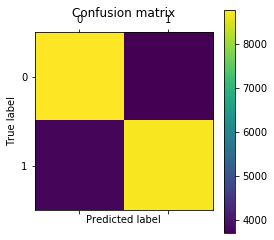

tf_idf_withStopWords Desision_Tree Confusion_Matrix [[8769 3711]
 [3780 8720]]
tf_idf_withStopWords Desision_Tree ROC [0.         0.29735577 1.        ] [0.     0.6976 1.    ] [2. 1. 0.]
tf_idf_withStopWords Desision_Tree AUC 0.7001221153846154
tf_idf_withStopWords Desision_Tree Precision 0.7001264527406199
tf_idf_withStopWords Desision_Tree Recall 0.7001221153846153
tf_idf_withStopWords Desision_Tree f1_Score 0.7001189422083387


In [26]:
methodsNameList = ['BOW', 'tf_idf_withoutStopWords', 'tf_idf_withStopWords']
classificationsNameList = ['Naive_Bayes', 'Random_Forest', 'Desision_Tree']
metricsNameList = ['Confusion_Matrix', 'ROC', 'AUC', 'Precision', 'Recall', 'f1_Score']

methodsList = [BOW, tf_idf_withoutStopWords, tf_idf_withStopWords]
classificationsList = [NaiveBayes, RandomForest, DesisionTree]
metricsList = [confusionMatrix, roc, auc, precision, recall, f1Score]

for method, methodName in zip(methodsList, methodsNameList):
    X_train, y_train, X_test, y_test = method(allData)

    for classification, classificationName in zip(classificationsList, classificationsNameList):
        y_pred = classification(X_train, y_train, X_test)

        for metric, metricName in zip(metricsList, metricsNameList):

            if metric == roc:
                res1,res2,res3 = metric(y_test, y_pred)
                print(methodName, classificationName,metricName, res1,res2,res3)
            else:
                resault = metric(y_test, y_pred)
                print(methodName, classificationName,metricName, resault)

در این قسمت به ارزیابی روش BERT می پردازیم.

In [0]:
methodsNameList = ['BERT_Embeding']
classificationsNameList = ['Naive_Bayes', 'Random_Forest', 'Desision_Tree', 'SVM']
metricsNameList = ['Confusion_Matrix', 'ROC', 'AUC', 'Precision', 'Recall', 'f1_Score']

methodsList = [BERT_Embeding]
classificationsList = [NaiveBayes, RandomForest, DesisionTree, SVM]
metricsList = [confusionMatrix, roc, auc, precision, recall, f1Score]

X_train, y_train, X_test, y_test = BERT_Embeding(allData)
for classification, classificationName in zip(classificationsList, classificationsNameList):
    y_pred = classification(X_train, y_train, X_test)

    for metric, metricName in zip(metricsList, metricsNameList):

        if metric == roc:
            res1,res2,res3 = metric(y_test, y_pred)
            print(methodName, classificationName,metricName, res1,res2,res3)
        else:
            resault = metric(y_test, y_pred)
            print(methodName, classificationName,metricName, resault)


100%|██████████| 405M/405M [00:08<00:00, 48.9MB/s]


train Bert i:  0
train Bert i:  1
train Bert i:  2
train Bert i:  3
train Bert i:  4
train Bert i:  5
train Bert i:  6
train Bert i:  7
train Bert i:  8
train Bert i:  9
train Bert i:  10
train Bert i:  11
train Bert i:  12
train Bert i:  13
train Bert i:  14
train Bert i:  15
train Bert i:  16
train Bert i:  17
train Bert i:  18
train Bert i:  19
train Bert i:  20
train Bert i:  21
train Bert i:  22
train Bert i:  23
train Bert i:  24
train Bert i:  25
train Bert i:  26
train Bert i:  27
train Bert i:  28
train Bert i:  29
train Bert i:  30
train Bert i:  31
train Bert i:  32
train Bert i:  33
train Bert i:  34
train Bert i:  35
train Bert i:  36
train Bert i:  37
train Bert i:  38
train Bert i:  39
train Bert i:  40
train Bert i:  41
train Bert i:  42
train Bert i:  43
train Bert i:  44
train Bert i:  45
train Bert i:  46
train Bert i:  47
train Bert i:  48
train Bert i:  49
train Bert i:  50
train Bert i:  51
train Bert i:  52
train Bert i:  53
train Bert i:  54
train Bert i:  55
tr

NameError: ignored

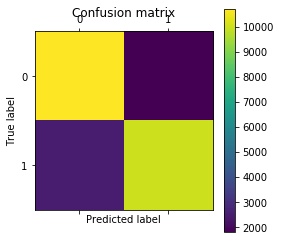

BERT_Embeding Naive_Bayes Confusion_Matrix [[10698  1782]
 [ 2472 10028]]
BERT_Embeding Naive_Bayes ROC [0.         0.14278846 1.        ] [0.      0.80224 1.     ] [2. 1. 0.]
BERT_Embeding Naive_Bayes AUC 0.8297257692307691
BERT_Embeding Naive_Bayes Precision 0.8307058031589769
BERT_Embeding Naive_Bayes Recall 0.8297257692307691
BERT_Embeding Naive_Bayes f1_Score 0.8295811653087195


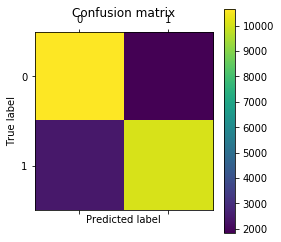

BERT_Embeding Random_Forest Confusion_Matrix [[10633  1847]
 [ 2410 10090]]
BERT_Embeding Random_Forest ROC [0.         0.14799679 1.        ] [0.     0.8072 1.    ] [2. 1. 0.]
BERT_Embeding Random_Forest AUC 0.8296016025641025
BERT_Embeding Random_Forest Precision 0.8302487822112887
BERT_Embeding Random_Forest Recall 0.8296016025641026
BERT_Embeding Random_Forest f1_Score 0.8295031047430905


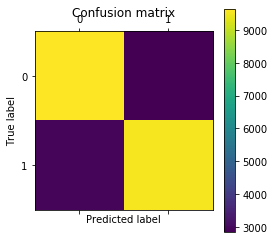

BERT_Embeding Desision_Tree Confusion_Matrix [[9641 2839]
 [2956 9544]]
BERT_Embeding Desision_Tree ROC [0.         0.22748397 1.        ] [0.      0.76352 1.     ] [2. 1. 0.]
BERT_Embeding Desision_Tree AUC 0.7680180128205127
BERT_Embeding Desision_Tree Precision 0.7680375125495508
BERT_Embeding Desision_Tree Recall 0.7680180128205127
BERT_Embeding Desision_Tree f1_Score 0.7680109134780762


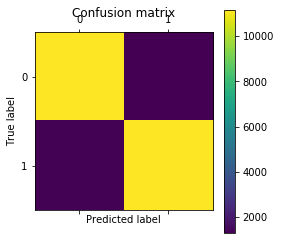

BERT_Embeding SVM Confusion_Matrix [[11181  1299]
 [ 1350 11150]]
BERT_Embeding SVM ROC [0.         0.10408654 1.        ] [0.    0.892 1.   ] [2. 1. 0.]
BERT_Embeding SVM AUC 0.8939567307692307
BERT_Embeding SVM Precision 0.8939607234096392
BERT_Embeding SVM Recall 0.8939567307692308
BERT_Embeding SVM f1_Score 0.8939550008153132


In [0]:
for classification, classificationName in zip(classificationsList, classificationsNameList):
    y_pred = classification(X_train, y_train, X_test)

    for metric, metricName in zip(metricsList, metricsNameList):

        if metric == roc:
            res1,res2,res3 = metric(y_test, y_pred)
            print(methodsNameList[0], classificationName,metricName, res1,res2,res3)
        else:
            resault = metric(y_test, y_pred)
            print(methodsNameList[0], classificationName,metricName, resault)

In [0]:
!unzip '/content/drive/My Drive/aclImdb.zip' -d '/content/sample_data/data/'